# Trabalhando com Pandas

## Importando a biblioteca

In [1]:
import pandas as pd

## Importação dos dados

Vamos importar os dados e explorá-los um pouco.

In [15]:
filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv')
filmes.columns = ['filmeId', 'titulo','generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [16]:
avaliacoes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv')
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [96]:
#Renomeando o nome das colunas.
avaliacoes.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [97]:
#Buscando os filmes com Id igual a 1.
avaliacoes.query('filmeId == 1')

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [98]:
#Obtendo uma visão geral dos dados.
avaliacoes.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [99]:
#Buscando valores exato de uma determinada coluna.
avaliacoes['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [100]:
#Buscando media de uma determinada coluna.
avaliacoes['nota'].mean()

3.501556983616962

In [101]:
#Agrupando os filmes e visualizando a medía.
notas_medias_por_filmes = avaliacoes.groupby('filmeId')['nota'].mean()
notas_medias_por_filmes.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [102]:
filmes

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [103]:
notas_medias_por_filmes

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [112]:
#Juntando o dataframe e a serie
filmes_com_media = filmes.join(notas_medias_por_filmes, on = 'filmeId')
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [113]:
#Ordenando em orde decrecente
filmes_com_media.sort_values('nota', ascending=False).head(15)

,filmeId,titulo,generos,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


In [114]:
import matplotlib.pyplot as plt

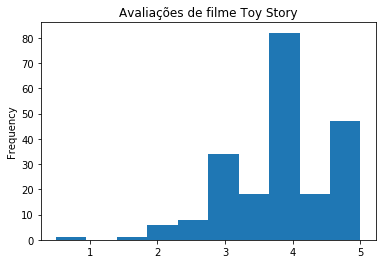

In [115]:
avaliacoes.query('filmeId == 1')['nota'].plot(kind = 'hist')
plt.title('Avaliações de filme Toy Story')
plt.show()

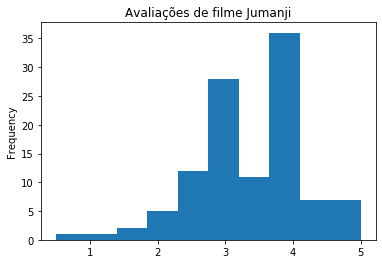

In [116]:
avaliacoes.query('filmeId == 2')['nota'].plot(kind = 'hist')
plt.title('Avaliações de filme Jumanji')
plt.show()

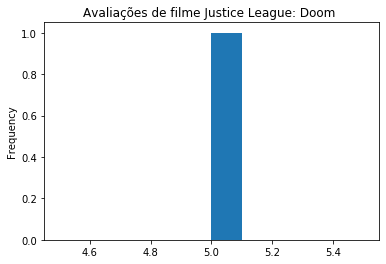

In [117]:
avaliacoes.query('filmeId == 102084')['nota'].plot(kind = 'hist')
plt.title('Avaliações de filme Justice League: Doom ')
plt.show()

## Desafio 1

In [128]:
numero_de_filmes_sem_nota=\
filmes_com_media.isnull()['filmeId'].count()
print("Numero de filmes sem nota: ", numero_de_filmes_sem_nota)

Numero de filmes sem nota:  9742


## Desafio 2

In [131]:
filmes_com_media.rename(columns={'nota': 'media'}, inplace = True)
filmes_com_media.head()

,filmeId,titulo,generos,media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


## Desafio 3

In [139]:
numero_de_avaliacao_por_filme = avaliacoes.groupby("filmeId")\
['nota'].count()
avaliacao_por_filme = filmes_com_media
avaliacao_por_filme = avaliacao_por_filme.join(numero_de_avaliacao_por_filme, on='filmeId')
avaliacao_por_filme.rename(columns= {"nota":"numero_de_votos"},inplace=True)
avaliacao_por_filme.head()


,filmeId,titulo,generos,media,numero_de_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0
